**Set Up**

In [1]:
!pip install opencv-python tensorflow matplotlib;

In [2]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set working directory

import os

new_dir = "/content/drive/MyDrive/Colab Notebooks/ImageToAudio/data"
os.chdir(new_dir)

print(f"new dir: {os.getcwd()}")

new dir: /content/drive/MyDrive/Colab Notebooks/ImageToAudio/data


**Load and Preprocess**

new dir: /content/drive/MyDrive/Colab Notebooks/ImageToAudio/data
Image Shape: (1880, 2000, 3)
New Image Shape: (250, 250, 3)


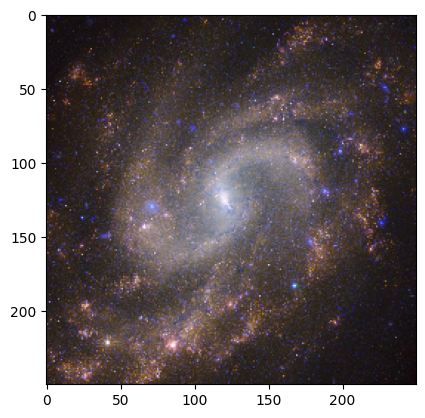

In [4]:
import cv2
import matplotlib.pyplot as plt

print(f"new dir: {os.getcwd()}")

# Load Image Data
image = cv2.imread('2 - Galaxy.png')

# Get Image Shape
print(f"Image Shape: {image.shape}")

#  Resize Image
img = cv2.resize(image, (250,250))

# Check Resizing
print(f"New Image Shape: {img.shape}")

plt.imshow(img)

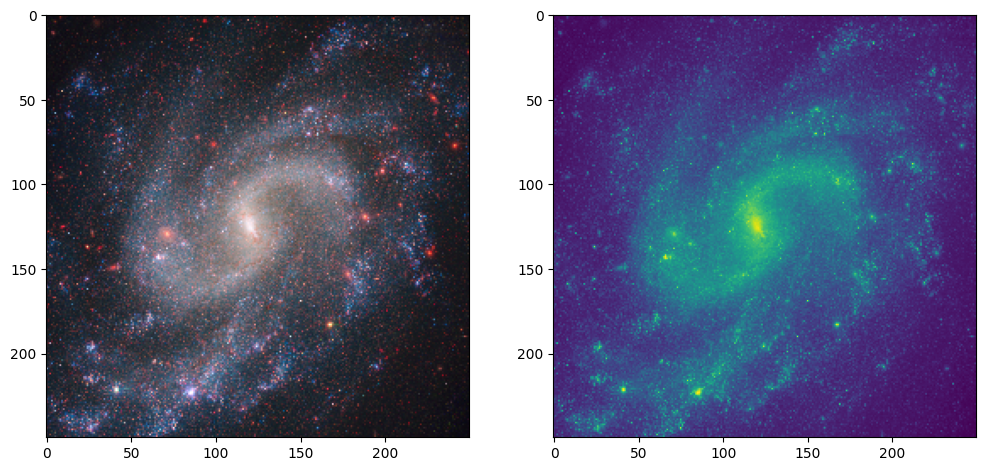

In [5]:
# Obtain Image Features
import numpy as np

# Convert to RGB for visualization with Matplotlib
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale version to extract intensity
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the original image and grayscale image using Matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image_rgb) # View RGB

axs[1].imshow(image_gray) # View Gray

In [6]:
# Extract Color and Intensity for Each Pixel

height, width, channels = image.shape

for x in range(width):
  if x == 125:
    break
  for y in range(height):
    if y == 125:
      break

    # Get RGB values
    r, g, b = image_rgb[x, y]

    # Get Grayscale Intensity
    intensity = image_gray[x, y]

  # Display Pixel Info
  if x < 251:
    print(f"Pixel at ({x}, {y}: R={r}, G={g}, B={b}, Intensity={intensity})")

Pixel at (0, 125: R=22, G=28, B=34, Intensity=27)
Pixel at (1, 125: R=36, G=35, B=37, Intensity=36)
Pixel at (2, 125: R=30, G=34, B=38, Intensity=33)
Pixel at (3, 125: R=34, G=39, B=36, Intensity=37)
Pixel at (4, 125: R=13, G=84, B=59, Intensity=60)
Pixel at (5, 125: R=68, G=38, B=38, Intensity=47)
Pixel at (6, 125: R=25, G=30, B=36, Intensity=29)
Pixel at (7, 125: R=50, G=36, B=36, Intensity=40)
Pixel at (8, 125: R=31, G=31, B=38, Intensity=32)
Pixel at (9, 125: R=27, G=27, B=39, Intensity=28)
Pixel at (10, 125: R=85, G=53, B=48, Intensity=62)
Pixel at (11, 125: R=22, G=30, B=33, Intensity=28)
Pixel at (12, 125: R=56, G=31, B=43, Intensity=40)
Pixel at (13, 125: R=32, G=30, B=39, Intensity=32)
Pixel at (14, 125: R=28, G=38, B=45, Intensity=36)
Pixel at (15, 125: R=21, G=36, B=34, Intensity=31)
Pixel at (16, 125: R=19, G=30, B=35, Intensity=27)
Pixel at (17, 125: R=24, G=27, B=36, Intensity=27)
Pixel at (18, 125: R=21, G=29, B=33, Intensity=27)
Pixel at (19, 125: R=18, G=32, B=34, Inte

In [9]:
# Convert Features to Frequencies, only based on intensity
fbase = 800
fmax = 1300
freq_array = []

for x in range(width):
  if x == 125:
    break
  max_intensity = 0

  for y in range(height):
    if y == 125:
      break

    intensity = image_gray[x, y]

    if intensity > max_intensity:
      max_intensity = intensity

  # Convert Max_Intensity to Frequency
  f = fbase + (max_intensity / 255) * (fmax - fbase)
  freq_array.append(f)
  # print(f"Max Intensity for x={x}: {max_intensity} converted to Frequency = {f}")
  print(freq_array)

[1035.2941176470588]
[1035.2941176470588, 939.2156862745098]
[1035.2941176470588, 939.2156862745098, 907.843137254902]
[1035.2941176470588, 939.2156862745098, 907.843137254902, 1129.4117647058824]
[1035.2941176470588, 939.2156862745098, 907.843137254902, 1129.4117647058824, 1001.9607843137255]
[1035.2941176470588, 939.2156862745098, 907.843137254902, 1129.4117647058824, 1001.9607843137255, 1013.7254901960785]
[1035.2941176470588, 939.2156862745098, 907.843137254902, 1129.4117647058824, 1001.9607843137255, 1013.7254901960785, 921.5686274509803]
[1035.2941176470588, 939.2156862745098, 907.843137254902, 1129.4117647058824, 1001.9607843137255, 1013.7254901960785, 921.5686274509803, 949.0196078431372]
[1035.2941176470588, 939.2156862745098, 907.843137254902, 1129.4117647058824, 1001.9607843137255, 1013.7254901960785, 921.5686274509803, 949.0196078431372, 925.4901960784314]
[1035.2941176470588, 939.2156862745098, 907.843137254902, 1129.4117647058824, 1001.9607843137255, 1013.7254901960785, 9

In [8]:
import numpy as np
from scipy.io.wavfile import write

def generate_sine_wave(frequency, duration, sample_rate=22050):
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    tone = np.sin(2 * np.pi * frequency * t)
    return tone

total_duration = 20
duration_wave_1 = total_duration / len(freq_array)

# Harmonics
num_harmonics = 3
harmonic_amplitude_scale = 0.5

combined_wave = np.array([])

for frequency in freq_array:
    frequency /= 3

    sine_wave_1 = generate_sine_wave(frequency, duration_wave_1)

    for harmonic in range(2, num_harmonics + 1):
      harmonic_freq = frequency * harmonic
      sine_wave_1 += harmonic_amplitude_scale * generate_sine_wave(harmonic_freq, duration_wave_1)

    combined_wave = np.concatenate((combined_wave, sine_wave_1))

# Normalize
combined_wave /= np.max(np.abs(combined_wave))

def wave_shaper(combined_wave):
    shaped_wave = np.tanh(combined_wave * 5)  # Soft clipping using a tanh function
    return shaped_wave

shaped_wave = wave_shaper(combined_wave)

# Save the generated tone as a .wav file
write("1audio.wav", 22050, (shaped_wave * 32767).astype(np.int16))